# MATH 221 Homework 6

* Enter your solutions in the cells with `YOUR CODE HERE`
* Run the tests to verify your results
* Some cells contain hidden tests which are only run **after** you submit your work for grading therefore your work may not be entirely correct even if all tests pass
* See [Python and Jupyter for UBC Math](https://ubcmath.github.io/python/) and [Mathematical Python](https://patrickwalls.github.io/mathematicalpython/) to learn more about Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Interpolation

Consider $d+1$ points $(x_0,y_0),\dots,(x_d,y_d)$ with different $x$ values (that is $x_i \ne x_j$ for $i \ne j$). An **interpolant** for the data is any function $f(x)$ such that $f(x_i) = y_i$ for each $i=0,\dots,d$. In other words, an interpolant $f(x)$ passes through (or interpolates) the data . There are infinitely many interpolants for any set of data and so we have to make a choice about what kind of function we want to use to interpolate the data.

**Polynomial interpolation** is when we choose the interpolant to be a polynomial

$$
f(x) = c_0 + c_1 x + c_2 x^2 + \cdots + c_d x^d
$$

The coefficients $c_0,c_1,\dots,c_d$ are unknown and we use the data to find them. In particular, each point defines an equation $f(x_i) = y_i$ for each $i=0,\dots,d$ therefore we use a polynomial of degree $d$ to interpolate $d+1$ points so that the number of equations is equal to the number of unknowns. The system of equations is given by

$$
\begin{array}{ccccccccccc}
c_0 & + & c_1 x_0 & + & c_2 x_0^2 & + & \cdots & + & c_d x_0^d & = & y_0 \\
c_0 & + & c_1 x_1 & + & c_2 x_1^2 & + & \cdots & + & c_d x_1^d & = & y_1 \\
& & & & & & & & & \vdots & \\
c_0 & + & c_1 x_d & + & c_2 x_d^2 & + & \cdots & + & c_d x_d^d & = & y_d \\
\end{array}
$$

In matrix notation we have $A \mathbf{c} = \mathbf{y}$ where

$$
A = \begin{bmatrix} 1 & x_0 & \cdots & x_0^d \\ 1 & x_1 & \cdots & x_1^d \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_d & \cdots & x_d^d \end{bmatrix}
\hspace{1in}
\mathbf{c} = \begin{bmatrix} c_0 \\ c_1 \\ \vdots \\ c_d \end{bmatrix}
\hspace{1in}
\mathbf{y} = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_d \end{bmatrix}
$$

For example, let's compute the unique polynomial of degree 2 which interpolates the points $(0,1),(1,0),(2,1)$.

In [3]:
x0 = 0; x1 = 1; x2 = 2;
y0 = 1; y1 = 0; y2 = 1;

A = np.array([[1,x0,x0**2],[1,x1,x1**2],[1,x2,x2**2]])
y = np.array([y0,y1,y2])
c = la.solve(A,y)

print(c)

[ 1. -2.  1.]


The solution is $f(x) = 1 - 2x + x^2$. Compute the values to check the result:

$$
\begin{array}{ccccccc}
1 & - & 2 (0) & + & (0)^2 & = & 1 \\
1 & - & 2 (1) & + & (1)^2 & = & 0 \\
1 & - & 2 (2) & + & (2)^2 & = & 1
\end{array}
$$

Success! Plot the polynomial and the data to verify the result:

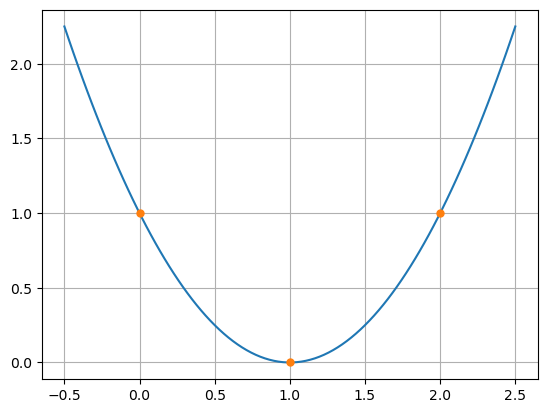

In [4]:
X = np.linspace(-0.5,2.5,100)
Y = c[0] + c[1]*X + c[2]*X**2
plt.plot(X,Y)
plt.plot([x0,x1,x2],[y0,y1,y2],'.',ms=10)
plt.grid(True)
plt.show()

## Problem 1 (3 marks)

Compute coefficients $c_0,c_1,c_2$ of the polynomial $f(x) = c_0 + c_1 x + c_2 x^2$ which interpolates the points $(-1,2),(0,-1),(2,1)$. Save the coefficients as a NumPy array called `c1`.

In [6]:
x0 = -1; x1 =  0; x2 = 2;
y0 =  2; y1 = -1; y2 = 1;

A = np.array([[1,x0,x0**2],[1,x1,x1**2],[1,x2,x2**2]])
y = np.array([y0,y1,y2])
c1 = la.solve(A,y)

print(c1)

[-1.         -1.66666667  1.33333333]


In [7]:
"Check if c1 is a NumPy array with 3 entries (1 mark)."
assert isinstance(c1,np.ndarray) , "c1 should be a NumPy array."
assert c1.size == 3 , "c1 should have 3 entries."
print("Problem 1 Test 1: Success!")

Problem 1 Test 1: Success!


In [8]:
"Check if c1 is has the correct values (2 marks). This cell contains hidden tests."
assert np.allclose(c1[0] + c1[1]*2 + c1[2]*2**2, 1) , "Polyniomial should satisfy f(2) = 1."
assert np.allclose(c1[0] + c1[1]*(-1) + c1[2]*(-1)**2, 2) , "Polyniomial should satisfy f(-1) = 2."
print("Problem 1 Test 2: Success!")

Problem 1 Test 2: Success!


Plot the polynomial and the data to verify the result:

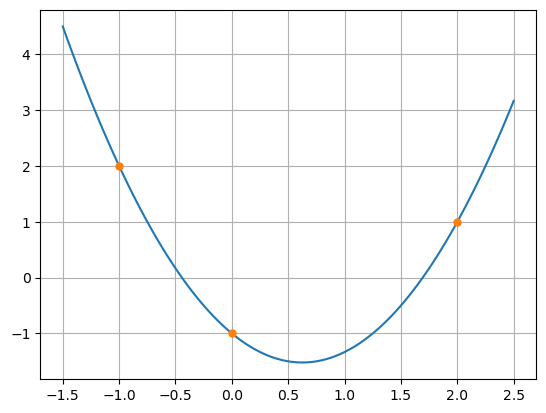

In [9]:
x0 = -1; x1 = 0; x2 = 2;
y0 = 2; y1 = -1; y2 = 1;

X = np.linspace(-1.5,2.5,100)
Y = c1[0] + c1[1]*X + c1[2]*X**2
plt.plot(X,Y)
plt.plot([x0,x1,x2],[y0,y1,y2],'.',ms=10)
plt.grid(True)
plt.show()

## Problem 2 (3 marks)

Compute coefficients $c_0,c_1,c_2,c_3$ such that the polynomial $p(x) = c_0 + c_1 x + c_2 x^2 + c3 x^3$ interpolates the points

$$
(-1,3),(1,-4),(2,0),(5,1)
$$

Save the coefficients as a NumPy array called `c2`.

In [10]:
x0 = -1; x1 =  1; x2 = 2; x3 = 5;
y0 =  3; y1 = -4; y2 = 0; y3 = 1;

A = np.array([[1,x0,x0**2,x0**3],[1,x1,x1**2,x1**3],[1,x2,x2**2,x2**3],[1,x3,x3**2,x3**3]])
y = np.array([y0,y1,y2,y3])
c2 = la.solve(A,y)

print(c2)

[-4.13888889 -2.93055556  3.63888889 -0.56944444]


In [11]:
"Check if c2 is a NumPy array with 4 entries (1 mark)."
assert isinstance(c2,np.ndarray) , "c2 should be a NumPy array."
assert c2.size == 4 , "c2 should have 4 entries."
print("Problem 2 Test 1: Success!")

Problem 2 Test 1: Success!


In [12]:
"Check if c2 is has the correct values (2 marks). This cell contains hidden tests."
assert np.allclose(c2[0] + c2[1]*5 + c2[2]*5**2 + c2[3]*5**3, 1) , "Polyniomial should satisfy f(5) = 1."
print("Problem 2 Test 2: Success!")

Problem 2 Test 2: Success!


Plot the polynomial and the data to verify the result:

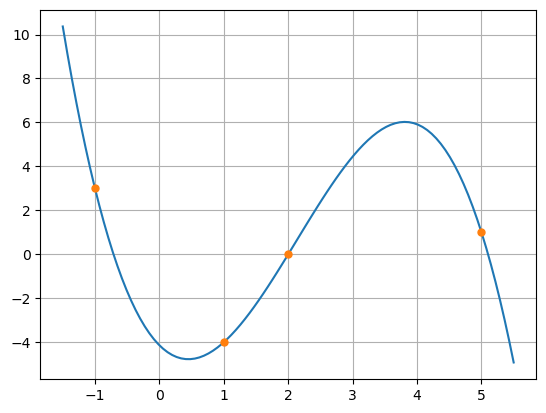

In [13]:
x = np.array([-1,1,2,5])
y = np.array([3,-4,0,1])
X = np.linspace(-1.5,5.5,100)
Y = c2[0] + c2[1]*X + c2[2]*X**2 + c2[3]*X**3
plt.plot(X,Y)
plt.plot(x,y,'.',ms=10)
plt.grid(True)
plt.show()

## Vandermonde Matrix

The matrix $A$ in polynomial interpolation is called the [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) for the points $x_0,x_1,\dots,x_d$. Use the NumPy function `np.vander` to create the Vandermonde matrix for a vector of $x$ values:

In [3]:
x = np.array([-2,-1,0,1,2,3])
A = np.vander(x,increasing=True)
print(A)

[[  1  -2   4  -8  16 -32]
 [  1  -1   1  -1   1  -1]
 [  1   0   0   0   0   0]
 [  1   1   1   1   1   1]
 [  1   2   4   8  16  32]
 [  1   3   9  27  81 243]]


The argument `increasing=True` builds the matrix such that the powers of the $x$ values increase from left to right. Let's use the result to compute the coefficients of the polynomial which interpolates the data

$$
(-2,0),(-1,0),(0,1),(1,0),(2,0),(3,0)
$$

In [4]:
y = np.array([0,0,1,0,0,0])
c = la.solve(A,y)
print(c)

[ 1.         -0.33333333 -1.25        0.41666667  0.25       -0.08333333]


Plot the polynomial and the data to verify the result:

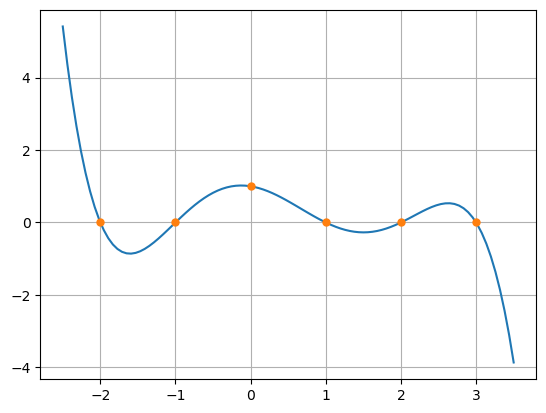

In [5]:
X = np.linspace(-2.5,3.5,100)
Y = c[0] + c[1]*X + c[2]*X**2 + c[3]*X**3 + c[4]*X**4 + c[5]*X**5
plt.plot(X,Y)
plt.plot(x,y,'.',ms=10)
plt.grid(True)
plt.show()

## Problem 3 (3 marks)

Construct the Vandermonde matrix for the $x$ values $-5,-2,0,1,4,6$. Save the matrix as `A3`.

In [6]:
x = np.array([-5,-2,0,1,4,6])
A3 = np.vander(x,increasing=True)
print(A3)

[[    1    -5    25  -125   625 -3125]
 [    1    -2     4    -8    16   -32]
 [    1     0     0     0     0     0]
 [    1     1     1     1     1     1]
 [    1     4    16    64   256  1024]
 [    1     6    36   216  1296  7776]]


In [7]:
"Check if A3 is a 6 by 6 NumPy array (1 mark)."
assert isinstance(A3,np.ndarray) , "A3 should be a NumPy array."
assert A3.shape == (6,6) , "A3 should be 6 by 6."
print("Problem 3 Test 1: Success!")

Problem 3 Test 1: Success!


In [8]:
"Check if A3 has the correct values (2 marks). This cell contains hidden tests. "
assert np.allclose(A3[0,:],[1,-5,(-5)**2,(-5)**3,(-5)**4,(-5)**5]) , "Row of A3 at index 0 should be [1,-5,25,-125,625,-3125]."
assert np.allclose(A3[4,:],[1,4,4**2,4**3,4**4,4**5]) , "Row of A3 at index 4 should be [1,4,16,64,256,1024]."
print("Problem 3 Test 2: Success!")

Problem 3 Test 2: Success!


Use the matrix `A3` to compute the coefficients of the polynomial which interpolates the data

$$
(-5,1),(-2,5),(0,3),(1,-2),(4,0),(6,-1)
$$

Save the coefficients as a NumPy array called `c3`.

In [9]:
y = np.array([1,5,3,-2,0,-1])
c3 = la.solve (A3,y)

print(c3)

[ 3.         -4.62441077 -0.9595679   0.56026936  0.03813131 -0.014422  ]


In [10]:
"Check if c3 is NumPy array of size 6 (1 mark)."
assert isinstance(c3,np.ndarray) , "c3 should be a NumPy array."
assert c3.size == 6 , "c3 should have 6 entries."
print("Problem 3 Test 3: Success!")

Problem 3 Test 3: Success!


In [11]:
"Check if c3 has the correct values (2 marks). This cell contains hidden tests."
assert np.allclose(c3[0],3) , "Constant coefficient should be 3."
assert np.allclose(c3[5],-0.014421998) , "Degree 5 coefficient should be -0.014421998."
print("Problem 3 Test 4: Success!")

Problem 3 Test 4: Success!


Plot the polynomial and the data to verify the result:

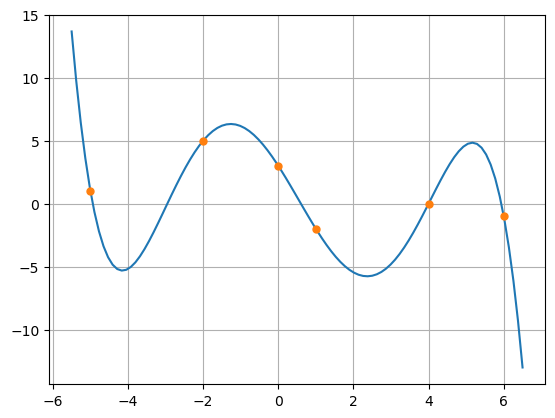

In [12]:
X = np.linspace(-5.5,6.5,100)
Y = sum([c3[i]*X**i for i in range(len(c3))])
plt.plot(X,Y)
x = [-5,-2,0,1,4,6]
y = [1,5,3,-2,0,-1]
plt.plot(x,y,'.',ms=10)
plt.grid(True)
plt.show()

## Problem 4 (3 marks)

Compute the coefficients of the polynomial of degree 10 which interpolates the 11 points $(x_n,\sin(\pi x_n))$ where $x_n = n/10$ for $n=0,\dots,10$.  Save the coefficients as a NumPy array `c4`.

The code below computes the vectors of $x$ and $y$ values:

In [16]:
N = 10
x = np.linspace(0,10,11)/N
print('x =',x)
y = np.sin(np.pi*x)
print('y =',y.round(6))

x = [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y = [0.       0.309017 0.587785 0.809017 0.951057 1.       0.951057 0.809017
 0.587785 0.309017 0.      ]


In [20]:
A = np.vander(x, increasing=True)
c4 = la.solve(A,y)

print(c4)

[ 0.00000000e+00  3.14159299e+00 -1.04708077e-05 -5.16757591e+00
 -1.00448549e-03  2.55481223e+00 -1.43385074e-02 -5.69058331e-01
 -4.34827561e-02  1.23831559e-01 -2.47663118e-02]


In [21]:
"Check if c4 is a NumPy array of size 11 (1 mark)."
assert isinstance(c4,np.ndarray) , "c4 should be a NumPy array."
assert c4.size == 11 , "c4 should have 11 entries."
print("Problem 4 Test 1: Success!")

Problem 4 Test 1: Success!


In [22]:
"Check if c3 has the corredct values (2 marks). This cell contains hidden tests."
assert np.allclose(c4[0],0) , "Constant term should be 0."
assert np.allclose(c4[1],np.pi) , "Degree 1 term should be pi."
print("Problem 4 Test 2: Success!")

Problem 4 Test 2: Success!


Plot the polynomial and the data to verify the result:

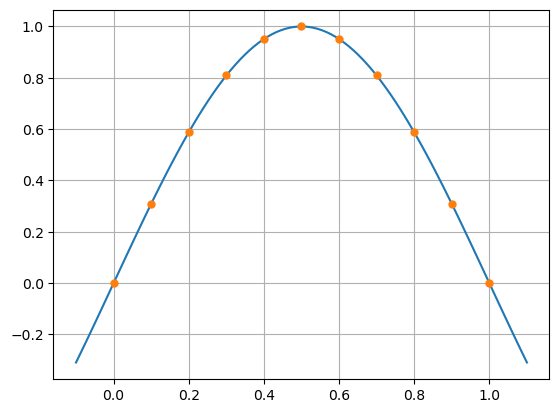

In [23]:
X = np.linspace(-0.1,1.1,100)
Y = sum([c4[i]*X**i for i in range(len(c4))])
plt.plot(X,Y)
x = np.linspace(0,10,11)/10
y = np.sin(np.pi*x)
plt.plot(x,y,'.',ms=10)
plt.grid(True)
plt.show()